In [4]:
import pandas as pd
import os
import zipfile
import kaggle
import opendatasets as od

In [5]:
!kaggle datasets list -s 'face-mask'

ref                                                              title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
andrewmvd/face-mask-detection                                    Face Mask Detection                                   416968083  2020-05-22 07:18:42.220000          94017       1846  0.875            
vijaykumar1799/face-mask-detection                               Face Mask Detection                                   232816416  2021-05-19 15:24:14.857000           7779         85  0.875            
prasoonkottarathil/face-mask-lite-dataset                        Face Mask Lite Dataset                              25002249935  2020-07-12 05:14:16.797000          12476        173  0.875   

In [6]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 69%|███████████████████████████▌            | 228M/330M [00:00<00:00, 2.39GB/s]
100%|████████████████████████████████████████| 330M/330M [00:00<00:00, 2.23GB/s]


In [7]:
!unzip ../data/face-mask-12k-images-dataset.zip

Archive:  ../data/face-mask-12k-images-dataset.zip
  inflating: Face Mask Dataset/Test/WithMask/1163.png  
  inflating: Face Mask Dataset/Test/WithMask/1174.png  
  inflating: Face Mask Dataset/Test/WithMask/1175.png  
  inflating: Face Mask Dataset/Test/WithMask/1203.png  
  inflating: Face Mask Dataset/Test/WithMask/1361.png  
  inflating: Face Mask Dataset/Test/WithMask/1362.png  
  inflating: Face Mask Dataset/Test/WithMask/1363.png  
  inflating: Face Mask Dataset/Test/WithMask/1388.png  
  inflating: Face Mask Dataset/Test/WithMask/1389.png  
  inflating: Face Mask Dataset/Test/WithMask/1404.png  
  inflating: Face Mask Dataset/Test/WithMask/1405.png  
  inflating: Face Mask Dataset/Test/WithMask/1407.png  
  inflating: Face Mask Dataset/Test/WithMask/1413.png  
  inflating: Face Mask Dataset/Test/WithMask/1439.png  
  inflating: Face Mask Dataset/Test/WithMask/147.png  
  inflating: Face Mask Dataset/Test/WithMask/152.png  
  inflating: Face Mask Dataset/Test/WithMask/153.png  


In [8]:
import os
import glob
import pandas as pd

path = '../data/Face Mask Dataset/'
dataset = {
    'image_path' : [],
    'mask_status' : [],
    'where' : []
}

for where in os.listdir(path):
    for status in os.listdir(path + '/' + where):
        for image in glob.glob(path + where + '/' + status + '/' + '*.png'):
            dataset['image_path'].append(image)
            dataset['mask_status'].append(status)
            dataset['where'].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,../data/Face Mask Dataset/Validation/WithMask/...,WithMask,Validation
1,../data/Face Mask Dataset/Validation/WithMask/...,WithMask,Validation
2,../data/Face Mask Dataset/Validation/WithMask/...,WithMask,Validation
3,../data/Face Mask Dataset/Validation/WithMask/...,WithMask,Validation
4,../data/Face Mask Dataset/Validation/WithMask/...,WithMask,Validation


With Mask 5909
Without Mask 5883


<Axes: xlabel='mask_status', ylabel='count'>

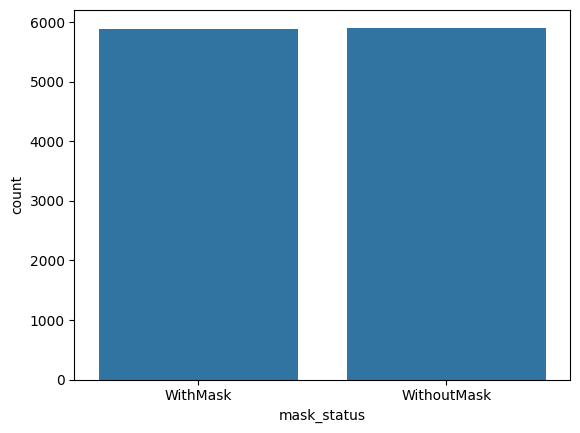

In [12]:
import seaborn as sns

print('With Mask', dataset.value_counts('mask_status').iloc[0])
print('Without Mask', dataset.value_counts('mask_status').iloc[1])

sns.countplot(x=dataset['mask_status'])

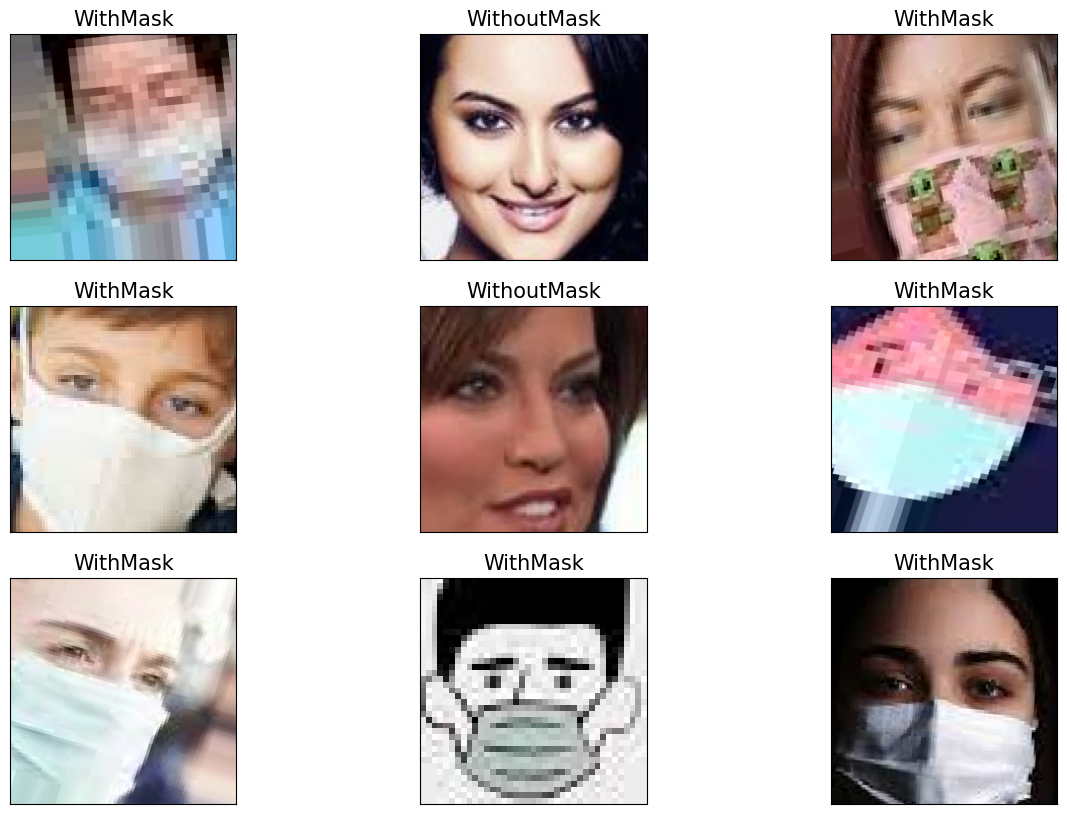

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(dataset.loc[random, "image_path"]), cv2.COLOR_BGR2RGB))
    plt.title(dataset.loc[random, "mask_status"], size=15)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [21]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                             image_path mask_status  where
1792  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1793  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1794  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1795  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1796  ../data/Face Mask Dataset/Train/WithMask/1260.png    WithMask  Train
1797  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1798  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1799  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1800  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train
1801  ../data/Face Mask Dataset/Train/WithMask/Augme...    WithMask  Train


Text(0.5, 1.0, 'Validation Dataset')

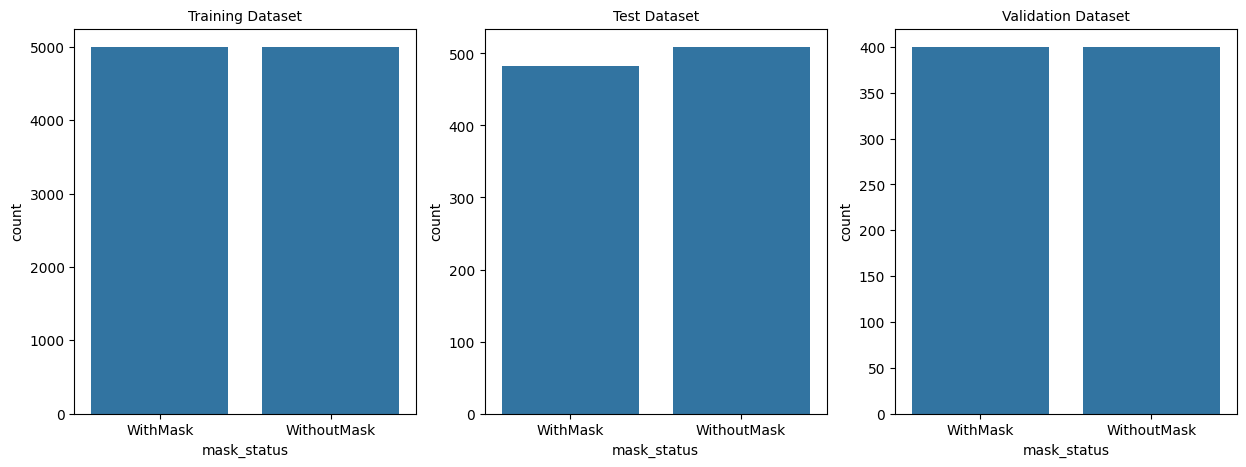

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(x=train_df["mask_status"])
plt.title("Training Dataset", size=10)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df["mask_status"])
plt.title("Test Dataset", size=10)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df["mask_status"])
plt.title("Validation Dataset", size=10)

In [25]:
train_df = train_df.reset_index().drop("index", axis=1)
train_df.head()

,image_path,mask_status,where
0,../data/Face Mask Dataset/Train/WithMask/Augme...,WithMask,Train
1,../data/Face Mask Dataset/Train/WithMask/Augme...,WithMask,Train
2,../data/Face Mask Dataset/Train/WithMask/Augme...,WithMask,Train
3,../data/Face Mask Dataset/Train/WithMask/Augme...,WithMask,Train
4,../data/Face Mask Dataset/Train/WithMask/1260.png,WithMask,Train


In [27]:
data = []
image_size = 150

for i in range(len(train_df)):
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [28]:
np.random.shuffle(data)

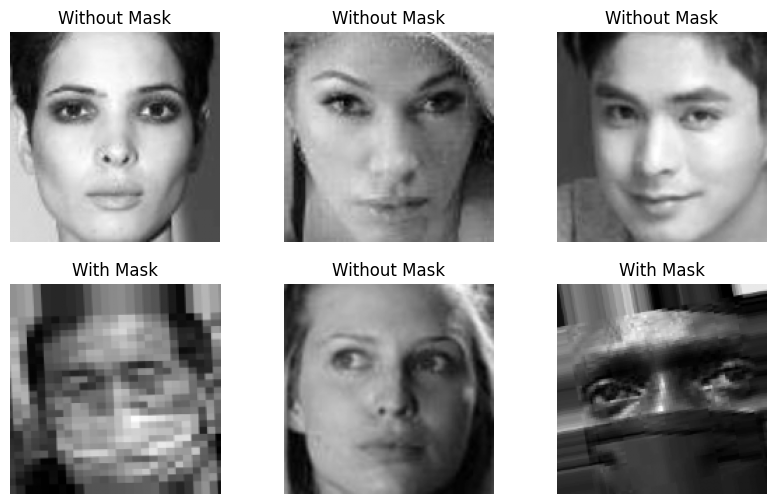

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))

for row in range(2):
    for col in range(3):
        image_index = row*100+col

        ax[row, col].axis("off")
        ax[row, col].imshow(data[image_index][0], cmap="gray")

        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")

plt.show()

In [30]:
data[0]

[array([[  7,   9,  11, ...,  62,  65,  68],
        [  9,  10,  11, ...,  63,  66,  68],
        [ 13,  12,  10, ...,  64,  66,  68],
        ...,
        [205, 205, 205, ...,  72,  72,  72],
        [205, 205, 205, ...,  72,  72,  72],
        [205, 205, 205, ...,  72,  72,  72]], dtype=uint8),
 0]

In [31]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=13)

In [39]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding="same", activation="relu",
                  input_shape=(150,150,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(64, (2,2), activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    87,617,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,627,089 (334.27 MB)

 Trainable params: 87,627,089 (334.27 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import tensorflow as tf

model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [41]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


2025-05-19 11:30:45.356944: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180000000 exceeds 10% of free system memory.
2025-05-19 11:30:45.461176: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180000000 exceeds 10% of free system memory.
I0000 00:00:1747621846.847600   25239 service.cc:146] XLA service 0x728c340053b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747621846.847641   25239 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-19 11:30:46.898422: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-19 11:30:47.115198: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
E0000 00:00:1747621848.182253   25239 gpu_timer.cc:183] Delay kernel timed out: measured time has sub

  4/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5788 - loss: 1987.4001

I0000 00:00:1747621850.021414   25239 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.7478 - loss: 228.3507
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9646 - loss: 0.1040
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9789 - loss: 0.0602
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9872 - loss: 0.0363
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9903 - loss: 0.0261


In [42]:
model.evaluate(X_val, y_val)

2025-05-19 11:31:41.696696: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45000000 exceeds 10% of free system memory.
2025-05-19 11:31:41.728693: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45000000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9682 - loss: 0.1220


[0.10434684157371521, 0.9725000262260437]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = (model.predict(X_val) > 0.5).astype('int32')

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

2025-05-19 11:33:01.700846: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45000000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1024
           1       0.97      0.97      0.97       976

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[996  28]
 [ 27 949]]
